# 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [4]:
# インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, isspmatrix
import scipy.sparse as sp
import statsmodels.api as sm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.metrics import mean_squared_error
%matplotlib inline



In [5]:
# スクラッチ

def scratch_train_test_split(*arrays, test_size=None, train_size=None, random_state=None):
    
    length = len(arrays[0]) # 行数
    np.random.seed(0)
    
    if len(arrays[0]) != len(arrays[-1]): # Xとyのサイズが違った場合
        raise ValueError("first array samples number({}) is not same as second array{}.".format(len(arrays[0]), len(arrays[-1])))
    
    if random_state is not None: # random_stateがNone以外の場合
        np.random.RandomState(seed=random_state)
        p = np.random.permutation(length)
    
    # index = 分割するインデックス
    if type(test_size) == int: # test_sizeがint型の場合
        index = length - test_size
    elif type(test_size) == float: # test_sizeがfloat型の場合
        index = int(length -  Decimal(length * test_size).quantize(Decimal('0'), ROUND_HALF_UP))
        
    else: # test_sizeがNoneの場合
        if type(train_size) == int: # train_sizeがint型の場合
            index = train_size
        elif type(train_size) == float: # train_sizeがfloat型の場合
            index = int(Decimal(length * train_size).quantize(Decimal('0'), ROUND_HALF_UP))
        else: # train_sizeがNoneの場合
            index = int(length - Decimal(length * 0.25).quantize(Decimal('0'), ROUND_HALF_UP))

    
    if random_state is not None:
        return [j for i in arrays for j in (i[p][:index], i[p][index:])]
    else:
        return [j for i in arrays for j in (i[:index], i[index:])]


In [6]:
# Irisデータセット呼び出し、Xとyに代入
from sklearn.datasets import load_iris
RAW = load_iris()

X = RAW.data[50:]
y = RAW.target[50:]

In [7]:
# スクラッチ関数で分割
s_x_train, s_x_test, s_y_train, s_y_test = scratch_train_test_split(X,y,test_size=0.25, random_state=50)
print(s_x_train, s_x_test, s_y_train, s_y_test)

comp = {}
comp['scratch'] = s_y_test

[[6.8 2.8 4.8 1.4]
 [6.3 3.4 5.6 2.4]
 [6.9 3.1 4.9 1.5]
 [7.6 3.  6.6 2.1]
 [7.2 3.2 6.  1.8]
 [6.8 3.2 5.9 2.3]
 [5.6 3.  4.5 1.5]
 [6.3 2.7 4.9 1.8]
 [6.5 3.  5.8 2.2]
 [6.7 3.  5.2 2.3]
 [6.3 2.9 5.6 1.8]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.1]
 [6.1 2.9 4.7 1.4]
 [4.9 2.4 3.3 1. ]
 [5.5 2.4 3.8 1.1]
 [6.3 2.5 4.9 1.5]
 [6.4 2.9 4.3 1.3]
 [6.  2.7 5.1 1.6]
 [6.6 2.9 4.6 1.3]
 [5.  2.3 3.3 1. ]
 [6.8 3.  5.5 2.1]
 [5.5 2.3 4.  1.3]
 [5.6 2.8 4.9 2. ]
 [5.7 3.  4.2 1.2]
 [5.1 2.5 3.  1.1]
 [6.3 3.3 4.7 1.6]
 [5.9 3.  5.1 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.5 3.2 5.1 2. ]
 [7.4 2.8 6.1 1.9]
 [6.7 3.1 5.6 2.4]
 [7.7 2.6 6.9 2.3]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.  1.7]
 [6.2 2.2 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [5.7 2.5 5.  2. ]
 [6.7 3.3 5.7 2.1]
 [6.4 3.2 4.5 1.5]
 [6.4 2.7 5.3 1.9]
 [5.8 2.6 4.  1.2]
 [6.1 3.  4.6 1.4]
 [6.5 2.8 4.6 1.5]
 [6.7 3.1 4.4 1.4]
 [5.8 2.7 4.1 1. ]
 [5.5 2.6 4.4 1.2]
 [5.6 3.  4.1 1.3]
 [5.7 2.8 4.5 1.3]
 [6.9 3.1 5.1 2.3]
 [7.2 3.6 6.1 2.5]
 [7.  3.2 4.

In [8]:
# scikit-learnのtrain_test_splitで分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, random_state=50)
print(x_train, x_test, y_train, y_test)

comp['defalt'] = y_test

[[5.6 2.9 3.6 1.3]
 [6.1 2.8 4.  1.3]
 [6.  2.2 4.  1. ]
 [6.7 2.5 5.8 1.8]
 [6.4 2.8 5.6 2.2]
 [6.7 3.  5.2 2.3]
 [6.3 3.4 5.6 2.4]
 [6.2 2.8 4.8 1.8]
 [6.5 3.  5.8 2.2]
 [6.7 3.1 5.6 2.4]
 [5.8 2.6 4.  1.2]
 [5.8 2.7 3.9 1.2]
 [6.1 2.8 4.7 1.2]
 [6.3 2.3 4.4 1.3]
 [6.8 3.  5.5 2.1]
 [5.2 2.7 3.9 1.4]
 [6.4 3.2 4.5 1.5]
 [5.7 3.  4.2 1.2]
 [7.2 3.2 6.  1.8]
 [7.6 3.  6.6 2.1]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.7 3.1 4.7 1.5]
 [4.9 2.5 4.5 1.7]
 [6.1 2.9 4.7 1.4]
 [5.7 2.9 4.2 1.3]
 [6.7 3.  5.  1.7]
 [6.4 2.9 4.3 1.3]
 [6.  2.9 4.5 1.5]
 [6.4 3.2 5.3 2.3]
 [4.9 2.4 3.3 1. ]
 [6.  3.  4.8 1.8]
 [6.4 2.7 5.3 1.9]
 [6.5 3.  5.2 2. ]
 [6.1 3.  4.9 1.8]
 [6.3 2.7 4.9 1.8]
 [5.7 2.5 5.  2. ]
 [5.7 2.6 3.5 1. ]
 [7.  3.2 4.7 1.4]
 [5.8 2.7 5.1 1.9]
 [5.  2.  3.5 1. ]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [6.5 3.  5.5 1.8]
 [6.5 3.2 5.1 2. ]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.4 3.8 1.1]
 [6.9 3.1 5.4 2.1]
 [5.6 2.5 3.9 1.1]
 [6.3 2.8 5.1 1.5]
 [5.8 2.8 5.

In [504]:
comp

{'scratch': array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
        1, 1, 2]),
 'defalt': array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 2, 2])}

scikit-learnを使ったコードを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。


分類問題
分類は3種類の手法をスクラッチします。


・ロジスティック回帰

・SVM

・決定木


ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。

[sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

[sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

データセットは3種類用意します。


1つ目は事前学習期間同様にirisデータセットです。


[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)


2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。


virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

# 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。



### Iris

In [505]:
# 標準化する
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(s_x_train)

x_train_std = sc.transform(s_x_train)
x_test_std = sc.transform(s_x_test)

In [506]:
# 出力関数
outlist = {}

def output(y, model, label,outlist={}):
    cm = confusion_matrix(y, model)
    ac = metrics.accuracy_score(y, model)
    pr = metrics.precision_score(y, model)
    rc = metrics.recall_score(y, model)
    f1 = metrics.f1_score(y, model)

    print('confusion matrix = \n', cm)
    print('accuracy = ', ac)
    print('precision = ', pr)
    print('recall = ', rc)
    print('f1 score = ', f1)

    outlist[label] = [cm, ac, pr, rc, f1]
    return outlist

In [507]:
# ロジスティック回帰

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def SGDC(x_train, y_train, x_test):
    clf = SGDClassifier(loss="log")
    clf.fit(x_train, y_train)
    y_pred_log = clf.predict(x_test)

    return y_pred_log


In [508]:
y_pred_log = SGDC(x_train_std, s_y_train, x_test_std)

print(s_y_test)
print(y_pred_log)


output(s_y_test, y_pred_log, "logistic")

[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 2]
[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 2]
confusion matrix = 
 [[14  0]
 [ 0 11]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


{'logistic': [array([[14,  0],
         [ 0, 11]]), 1.0, 1.0, 1.0, 1.0]}

In [519]:
# SVM

# SVM
from sklearn.svm import SVC


def SVM(x_train, y_train, x_test):
    svm = SVC(kernel='rbf', random_state=None)
    svm.fit(x_train, y_train)
    y_pred_svm = svm.predict(x_test)
    
    return y_pred_svm

y_pred_svm = SVM(x_train_std, s_y_train, x_test_std)

print(s_y_test)
print(y_pred_svm)

output(s_y_test, y_pred_svm, "SVM")

[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 2]
[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 1 1 2]
confusion matrix = 
 [[13  1]
 [ 0 11]]
accuracy =  0.96
precision =  1.0
recall =  0.9285714285714286
f1 score =  0.962962962962963


{'logistic': [array([[14,  0],
         [ 0, 11]]), 1.0, 1.0, 1.0, 1.0], 'SVM': [array([[13,  1],
         [ 0, 11]]),
  0.96,
  1.0,
  0.9285714285714286,
  0.962962962962963], 'TREE': [array([[13,  1],
         [ 0, 11]]), 0.96, 1.0, 0.9285714285714286, 0.962962962962963]}

In [520]:
# 決定木

from sklearn import tree


def TREE(x_train, y_train, x_test):
    tr = tree.DecisionTreeClassifier().fit(x_train, y_train)
    y_pred_tree = tr.predict(x_test)

    return y_pred_tree

y_pred_tree = TREE(x_train_std, s_y_train, x_test_std)
                   
print(s_y_test)
print(y_pred_tree)

output(s_y_test, y_pred_tree, "TREE")

[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 2]
[1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 1 1 2]
confusion matrix = 
 [[13  1]
 [ 0 11]]
accuracy =  0.96
precision =  1.0
recall =  0.9285714285714286
f1 score =  0.962962962962963


{'logistic': [array([[14,  0],
         [ 0, 11]]), 1.0, 1.0, 1.0, 1.0], 'SVM': [array([[13,  1],
         [ 0, 11]]),
  0.96,
  1.0,
  0.9285714285714286,
  0.962962962962963], 'TREE': [array([[13,  1],
         [ 0, 11]]), 0.96, 1.0, 0.9285714285714286, 0.962962962962963]}

### シンプルデータセット1

In [521]:
# シンプルデータセット1作成コード

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [522]:
# スクラッチ関数で分割
s1_x_train, s1_x_test, s1_y_train, s1_y_test = scratch_train_test_split(X,y,test_size=0.25, random_state=50)
print(s1_x_train, s1_x_test, s1_y_train, s1_y_test)


[[ 3.39914935e+00  2.88901434e-02]
 [-1.56151690e+00  1.88535921e+00]
 [ 2.37832028e+00 -1.74843901e+00]
 [-3.55952028e+00  3.78209935e-02]
 [ 2.15604470e+00 -3.85824429e-01]
 [ 1.04664333e+00 -2.56342734e+00]
 [ 3.56988241e+00  5.27423038e-01]
 [ 2.50666130e+00 -1.04875504e+00]
 [-1.65940413e+00  1.56173677e+00]
 [ 2.51444885e+00 -6.22624163e-01]
 [ 1.72206123e+00 -7.92274647e-01]
 [ 1.94741552e+00 -1.29638961e+00]
 [-1.55687772e-01  2.87716538e+00]
 [-2.36031478e+00 -2.12712451e-01]
 [ 2.40204230e+00  9.43523973e-02]
 [ 1.27787649e+00 -2.05456781e+00]
 [ 1.21732779e+00 -3.02963561e-01]
 [-6.94267835e-01  2.05600741e+00]
 [ 1.84369341e+00 -2.00474362e+00]
 [ 3.87606107e+00  3.13826215e-01]
 [ 7.81673591e-01 -2.41002258e+00]
 [-1.00944756e+00  1.29523033e+00]
 [ 1.46837064e+00 -1.14147604e+00]
 [ 1.28107479e+00 -2.13209644e-01]
 [ 4.06032004e+00  6.42967865e-01]
 [-1.97638843e-02  2.54412654e+00]
 [ 2.48267455e+00 -1.06055410e+00]
 [-5.14040279e-01  2.03708834e+00]
 [-1.22189723e+00  1

In [523]:
# 標準化

sc.fit(s1_x_train)

s1_x_train_std = sc.transform(s1_x_train)
s1_x_test_std = sc.transform(s1_x_test)

In [524]:
# ロジスティック回帰

s1_y_pred_log = SGDC(s1_x_train_std, s1_y_train, s1_x_test_std)

print(s1_y_test)
print(s1_y_pred_log)

output_simple1={}
output(s1_y_test, s1_y_pred_log, "logistic",output_simple1)

[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
confusion matrix = 
 [[58  0]
 [ 0 67]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


{'logistic': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0]}

In [525]:
# SVM

s1_y_pred_svm = SVM(s1_x_train_std, s1_y_train, s1_x_test_std)

print(s1_y_test)
print(s1_y_pred_svm)

output(s1_y_test, s1_y_pred_svm, "SVM",output_simple1)

[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
confusion matrix = 
 [[58  0]
 [ 0 67]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


{'logistic': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0], 'SVM': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0]}

In [526]:
# 決定木

s1_y_pred_tree = TREE(s1_x_train_std, s1_y_train, s1_x_test_std)
                   
print(s1_y_test)
print(s1_y_pred_tree)

output(s1_y_test, s1_y_pred_tree, "TREE", output_simple1)

[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
[ 1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1  1]
confusion matrix = 
 [[58  0]
 [ 0 67]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


{'logistic': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0], 'SVM': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0], 'TREE': [array([[58,  0],
         [ 0, 67]]), 1.0, 1.0, 1.0, 1.0]}

### シンプルデータセット2

In [527]:
# シンプルデータセット2作成コード

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [528]:
# スクラッチ関数で分割
s2_x_train, s2_x_test, s2_y_train, s2_y_test = scratch_train_test_split(X,y,test_size=0.25, random_state=50)
print(s2_x_train, s2_x_test, s2_y_train, s2_y_test)

[[ 0.58619   0.37158 ]
 [ 1.1319    2.4023  ]
 [-6.6797    0.67661 ]
 [ 0.14654  -0.28733 ]
 [-0.12243   9.0162  ]
 [-1.281    15.6824  ]
 [ 0.10645   1.9242  ]
 [ 0.6017    4.3439  ]
 [ 0.56421   0.72888 ]
 [ 0.96765   7.8929  ]
 [-2.1086    8.3428  ]
 [-0.57242  -2.9915  ]
 [-3.1108    0.15394 ]
 [ 0.96765  10.083   ]
 [-0.80647  -2.2135  ]
 [-4.1013   -4.353   ]
 [-3.5944   -4.0112  ]
 [ 0.057313  5.4681  ]
 [-1.9948   -1.3927  ]
 [-0.9888    4.5718  ]
 [-0.44699  -2.8073  ]
 [-2.5677   13.1779  ]
 [ 1.4771    3.4896  ]
 [-0.73535  -2.2718  ]
 [-3.0603   -3.6461  ]
 [ 0.50214  -0.31818 ]
 [-0.60216   8.4636  ]
 [-2.234    -2.5323  ]
 [-0.61251  -0.75345 ]
 [-1.4621   -2.4586  ]] [[ 0.35084  -0.031994]
 [ 1.3763    1.3347  ]
 [-2.9452   -1.8219  ]
 [ 0.5461    5.8245  ]
 [-3.1625   -3.9606  ]
 [-0.65259   9.3444  ]
 [ 0.59912   5.3524  ]
 [-2.353    -0.72261 ]
 [-2.9362    2.5462  ]
 [ 0.86291   2.3946  ]] [0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0] [1 1 1 1 0 1 1 1

In [529]:
# 標準化

sc.fit(s2_x_train)

s2_x_train_std = sc.transform(s2_x_train)
s2_x_test_std = sc.transform(s2_x_test)

In [530]:
# ロジスティック回帰

s2_y_pred_log = SGDC(s2_x_train_std, s2_y_train, s2_x_test_std)

print(s2_y_test)
print(s2_y_pred_log)

output_simple2={}
output(s2_y_test, s2_y_pred_log, "logistic", output_simple2)

[1 1 1 1 0 1 1 1 0 0]
[0 0 1 0 1 1 0 1 1 0]
confusion matrix = 
 [[1 2]
 [4 3]]
accuracy =  0.4
precision =  0.6
recall =  0.42857142857142855
f1 score =  0.5


{'logistic': [array([[1, 2],
         [4, 3]]), 0.4, 0.6, 0.42857142857142855, 0.5]}

In [531]:
# SVM

s2_y_pred_svm = SVM(s2_x_train_std, s2_y_train, s2_x_test_std)

print(s2_y_test)
print(s2_y_pred_svm)

output(s2_y_test, s2_y_pred_svm, "SVM",output_simple2)

[1 1 1 1 0 1 1 1 0 0]
[0 0 0 0 0 1 0 0 0 0]
confusion matrix = 
 [[3 0]
 [6 1]]
accuracy =  0.4
precision =  1.0
recall =  0.14285714285714285
f1 score =  0.25


{'logistic': [array([[1, 2],
         [4, 3]]), 0.4, 0.6, 0.42857142857142855, 0.5], 'SVM': [array([[3, 0],
         [6, 1]]), 0.4, 1.0, 0.14285714285714285, 0.25]}

In [532]:
# 決定木

s2_y_pred_tree = TREE(s2_x_train_std, s2_y_train, s2_x_test_std)
                   
print(s2_y_test)
print(s2_y_pred_tree)

output(s2_y_test, s2_y_pred_tree, "TREE", output_simple2)

[1 1 1 1 0 1 1 1 0 0]
[1 0 1 1 0 1 1 1 1 0]
confusion matrix = 
 [[2 1]
 [1 6]]
accuracy =  0.8
precision =  0.8571428571428571
recall =  0.8571428571428571
f1 score =  0.8571428571428571


{'logistic': [array([[1, 2],
         [4, 3]]), 0.4, 0.6, 0.42857142857142855, 0.5], 'SVM': [array([[3, 0],
         [6, 1]]),
  0.4,
  1.0,
  0.14285714285714285,
  0.25], 'TREE': [array([[2, 1],
         [1, 6]]), 0.8, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]}

回帰問題

回帰は1種類をスクラッチします。


線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。


[sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)


データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。


# 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [570]:
from sklearn.linear_model import SGDRegressor

In [538]:
# データ読み込み
data = pd.read_csv("train.csv")

In [550]:
# カラム指定
df = pd.DataFrame(data=data, columns=['GrLivArea', 'YearBuilt','SalePrice'])
print(df)

      GrLivArea  YearBuilt  SalePrice
0          1710       2003     208500
1          1262       1976     181500
2          1786       2001     223500
3          1717       1915     140000
4          2198       2000     250000
...         ...        ...        ...
1455       1647       1999     175000
1456       2073       1978     210000
1457       2340       1941     266500
1458       1078       1950     142125
1459       1256       1965     147500

[1460 rows x 3 columns]


In [567]:
# Xとyに代入
X = df.iloc[:,0:2].values
y = df['SalePrice'].values

In [568]:
s3_x_train, s3_x_test, s3_y_train, s3_y_test = scratch_train_test_split(X, y, random_state=50)
print(s3_x_train, s3_x_test, s3_y_train, s3_y_test)

[[ 923 1984]
 [1682 1970]
 [1208 1977]
 ...
 [ 630 1972]
 [2236 1997]
 [1389 1974]] [[1314 2007]
 [1635 1923]
 [ 848 2003]
 [1466 1959]
 [1077 1920]
 [1494 2006]
 [1494 2002]
 [2224 2004]
 [1779 1998]
 [1964 1911]
 [1200 1987]
 [1291 1996]
 [1099 1995]
 [1739 1999]
 [1889 1910]
 [ 864 1972]
 [1908 2002]
 [ 980 1977]
 [2090 1995]
 [1616 2005]
 [1482 1992]
 [1582 2004]
 [1750 1940]
 [1801 2005]
 [2296 2008]
 [1970 2006]
 [2634 1969]
 [1629 2003]
 [1578 2008]
 [1478 2009]
 [ 950 1971]
 [1426 1977]
 [1558 1950]
 [1337 1998]
 [1962 2006]
 [ 930 1946]
 [1440 1900]
 [1632 1967]
 [2822 2008]
 [1520 1955]
 [ 990 1994]
 [1268 1954]
 [ 835 1920]
 [1212 1977]
 [2601 1921]
 [1577 1939]
 [2084 2007]
 [1383 1960]
 [1393 1955]
 [1710 2007]
 [2035 2001]
 [1709 2004]
 [1784 1914]
 [1742 1882]
 [ 985 1977]
 [1432 2004]
 [1200 1965]
 [1218 1972]
 [1768 1937]
 [1306 2005]
 [2364 2009]
 [1440 1981]
 [1456 1976]
 [ 987 1972]
 [1573 1935]
 [1224 1999]
 [2020 1977]
 [1804 1999]
 [1048 1922]
 [1726 2007]
 [1590

In [580]:
# 標準化
sc = StandardScaler()
sc.fit(s3_x_train)

s3_x_train_std = sc.transform(s3_x_train)
s3_x_test_std = sc.transform(s3_x_test)

In [581]:
model = SGDRegressor(max_iter=1000)
model.fit(s3_x_train_std, s3_y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [582]:
print("切片:{}".format(model.intercept_)) 
print("傾き:{}".format(model.coef_))

切片:[177843.54042257]
傾き:[48647.19065233 30259.89099086]


In [596]:
#trainとtestでそれぞれ予測してみる
s3_y_train_pred = model.predict(s3_x_train_std)
s3_y_test_pred = model.predict(s3_x_test_std)
print(s3_y_test[:5])
print(s3_y_test_pred[:5])

[207500 210000 131500 149900  67000]
[197201.14742572 142464.72827668 149460.90353871 162975.90229289
  87106.94672022]


In [607]:
# 最小二乗誤差で評価
mse = mean_squared_error(s3_y_test, s3_y_test_pred)
mse

2730285023.9890733

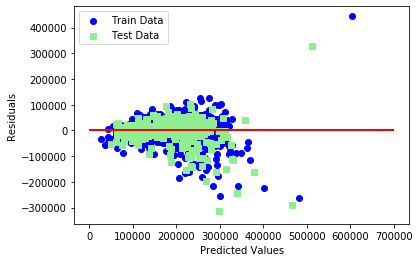

In [599]:
plt.scatter(s3_y_train_pred, s3_y_train_pred - s3_y_train, c = 'b', marker = 'o', label = 'Train Data')
plt.scatter(s3_y_test_pred, s3_y_test_pred - s3_y_test, c = 'lightgreen', marker = 's', label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 700000,lw = 2, color = 'red')

plt.show()


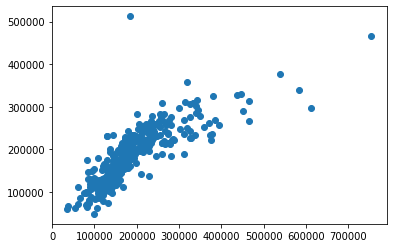

In [608]:
plt.scatter(s3_y_test,s3_y_test_pred)

In [610]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(s3_y_train, s3_y_train_pred), mean_squared_error(s3_y_test, s3_y_test_pred)))

MSE Train : 2003333523.679, Test : 2730285023.989
